In [40]:
import os

import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import simplstyles
from himalaya.backend import set_backend
from matplotlib import pyplot as plt
from voxelwise_tutorials.io import load_hdf5_array
from voxelwise_tutorials.viz import plot_flatmap_from_mapper, plot_2d_flatmap_from_mapper

from compare_variance_residual.fmri.features import get_pretty_feature_name
from compare_variance_residual.fmri.results import get_result_path

In [41]:
plt.style.use('nord-light-talk')
data_dir = "../../data"
backend = set_backend('torch_cuda', on_error='warn')
simplstyles.styles['nord-light-talk']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '#abb9cf',
          'axes.facecolor': 'white',
          'axes.grid': False,
          'axes.labelcolor': '#434c5e',
          'axes.labelsize': 18.0,
          'axes.linewidth': 1.25,
          'axes.prop_cycle': cycler('color', ['#5e81ac', '#88c0d0', '#d08770', '#bf616a', '#b48ead', '#a3be8c', '#ebcb8b', '#abb9cf']),
          'axes.spines.right': False,
          'axes.spines.top': False,
          'axes.titlelocation': 'left',
          'axes.titlesize': 18.0,
          'axes.titleweight': 'bold',
          'boxplot.showbox': False,
          'boxplot.showcaps': False,
          'boxplot.showfliers': False,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Inter',
                              'Helvetica',
                              'Arial',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                   

In [42]:
subject = 5
modality = "reading"
low_level_feature = "moten"

In [43]:
mapper_path = os.path.join("../../data", 'mappers', f"subject{subject:02}_mappers.hdf")
mapper = load_hdf5_array(mapper_path)
flatmap_mask = mapper['flatmap_mask']

# Load EV

In [44]:
ev_path = os.path.join(get_result_path(modality, subject), 'ev.csv')
ev = pd.read_csv(ev_path)
ev.describe()

# ev
count  80249.000000
mean       0.058670
std        0.097017
min       -0.289520
25%       -0.006331
50%        0.046185
75%        0.108376
max        0.622027

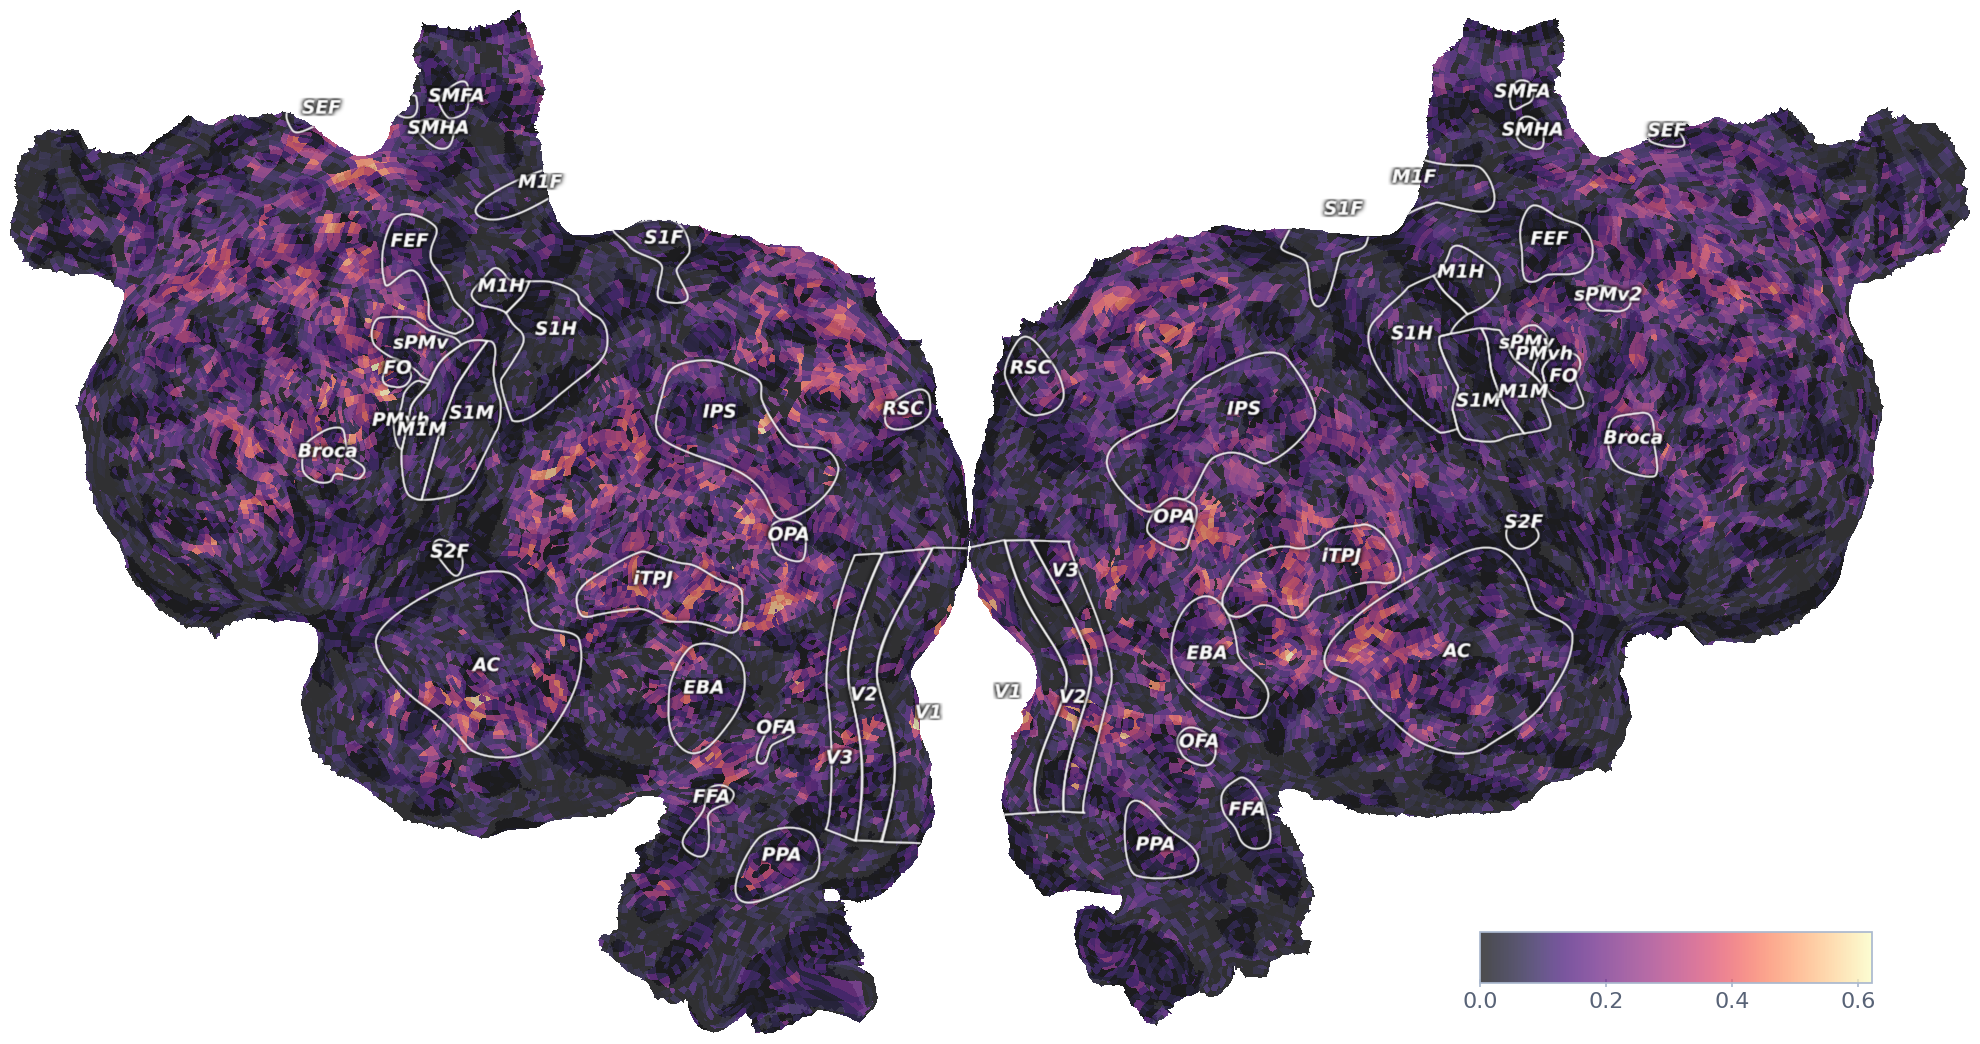

In [45]:
plot_flatmap_from_mapper(ev, mapper_path, with_curvature=True, vmin=0,
                         vmax=np.max(ev), colorbar_location=[0.75, 0.05, 0.2, 0.05], cmap='magma')
plt.show()

# Variance Partitioning

## Low Level Prediction

In [46]:
low_level_file = os.path.join(get_result_path(modality, subject), f"{low_level_feature}_scores.csv")

In [47]:
print(f"Loading {low_level_file}")
low_level_scores = pd.read_csv(low_level_file)
low_level_scores.describe()

Loading results/reading/subject05/moten_scores.csv


correlation_score      r2_score       p_value
count       80249.000000  80615.000000  8.024900e+04
mean            0.025760      0.001656  4.419772e-01
std             0.076152      0.013822  3.053137e-01
min            -0.239010     -0.097330  2.325417e-36
25%            -0.023628     -0.000101  1.629038e-01
50%             0.021089      0.000000  4.226573e-01
75%             0.067766      0.001002  7.056676e-01
max             0.650239      0.417849  9.999977e-01

In [48]:
low_level_correlation = low_level_scores['correlation_score']
low_level_correlation = low_level_correlation.to_numpy()
low_level_correlation = np.nan_to_num(low_level_correlation)

# significant_voxels = [True if p_value < 0.05 else False for p_value in low_level_scores['p_value']]
# masked_correlation = np.full(low_level_correlation.shape, np.nan)
# # set values to nan, if not significant
# masked_correlation[significant_voxels] = low_level_correlation[significant_voxels]

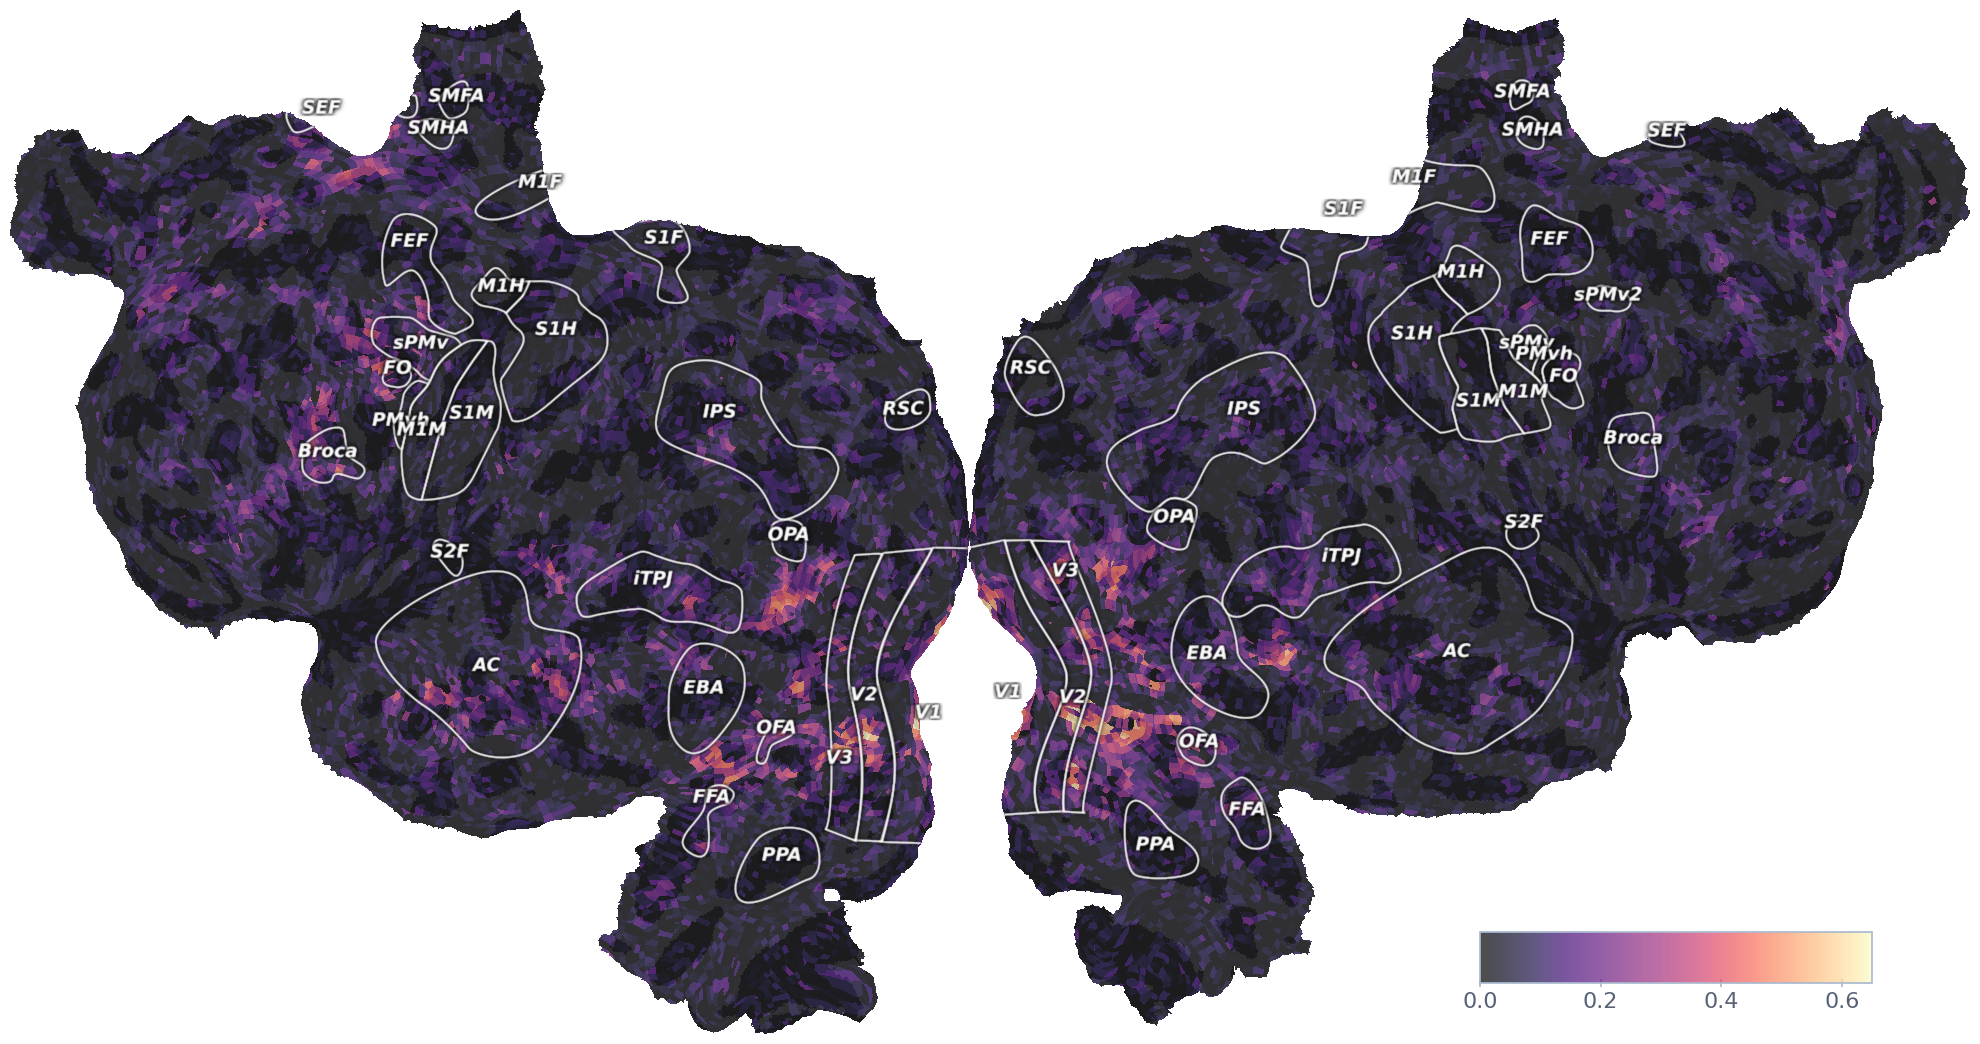

In [49]:
plot_flatmap_from_mapper(low_level_correlation, mapper_path, with_curvature=True, vmin=0,
                         vmax=np.max(low_level_correlation), colorbar_location=[0.75, 0.05, 0.2, 0.05], cmap='magma')
plt.show()

## Semantic Prediction

In [50]:
semantic_file = os.path.join(get_result_path(modality, subject), f"english1000_scores.csv")

In [51]:
semantic_scores = pd.read_csv(semantic_file)
semantic_scores.describe()

correlation_score      r2_score       p_value
count       80249.000000  8.061500e+04  8.024900e+04
mean            0.050896  5.929404e-03  3.821684e-01
std             0.093111  2.140350e-02  3.156566e-01
min            -0.295883 -1.116160e-01  4.339698e-29
25%            -0.011188 -7.605553e-05  7.623264e-02
50%             0.038809  1.192093e-07  3.318328e-01
75%             0.097161  3.562719e-03  6.541624e-01
max             0.593558  3.331026e-01  9.999978e-01

In [52]:
semantic_correlation = semantic_scores['correlation_score']
semantic_correlation = semantic_correlation.to_numpy()
semantic_correlation = np.nan_to_num(semantic_correlation)
vmax = semantic_correlation.max()
print(vmax)

0.5935575117397555


<Axes: >

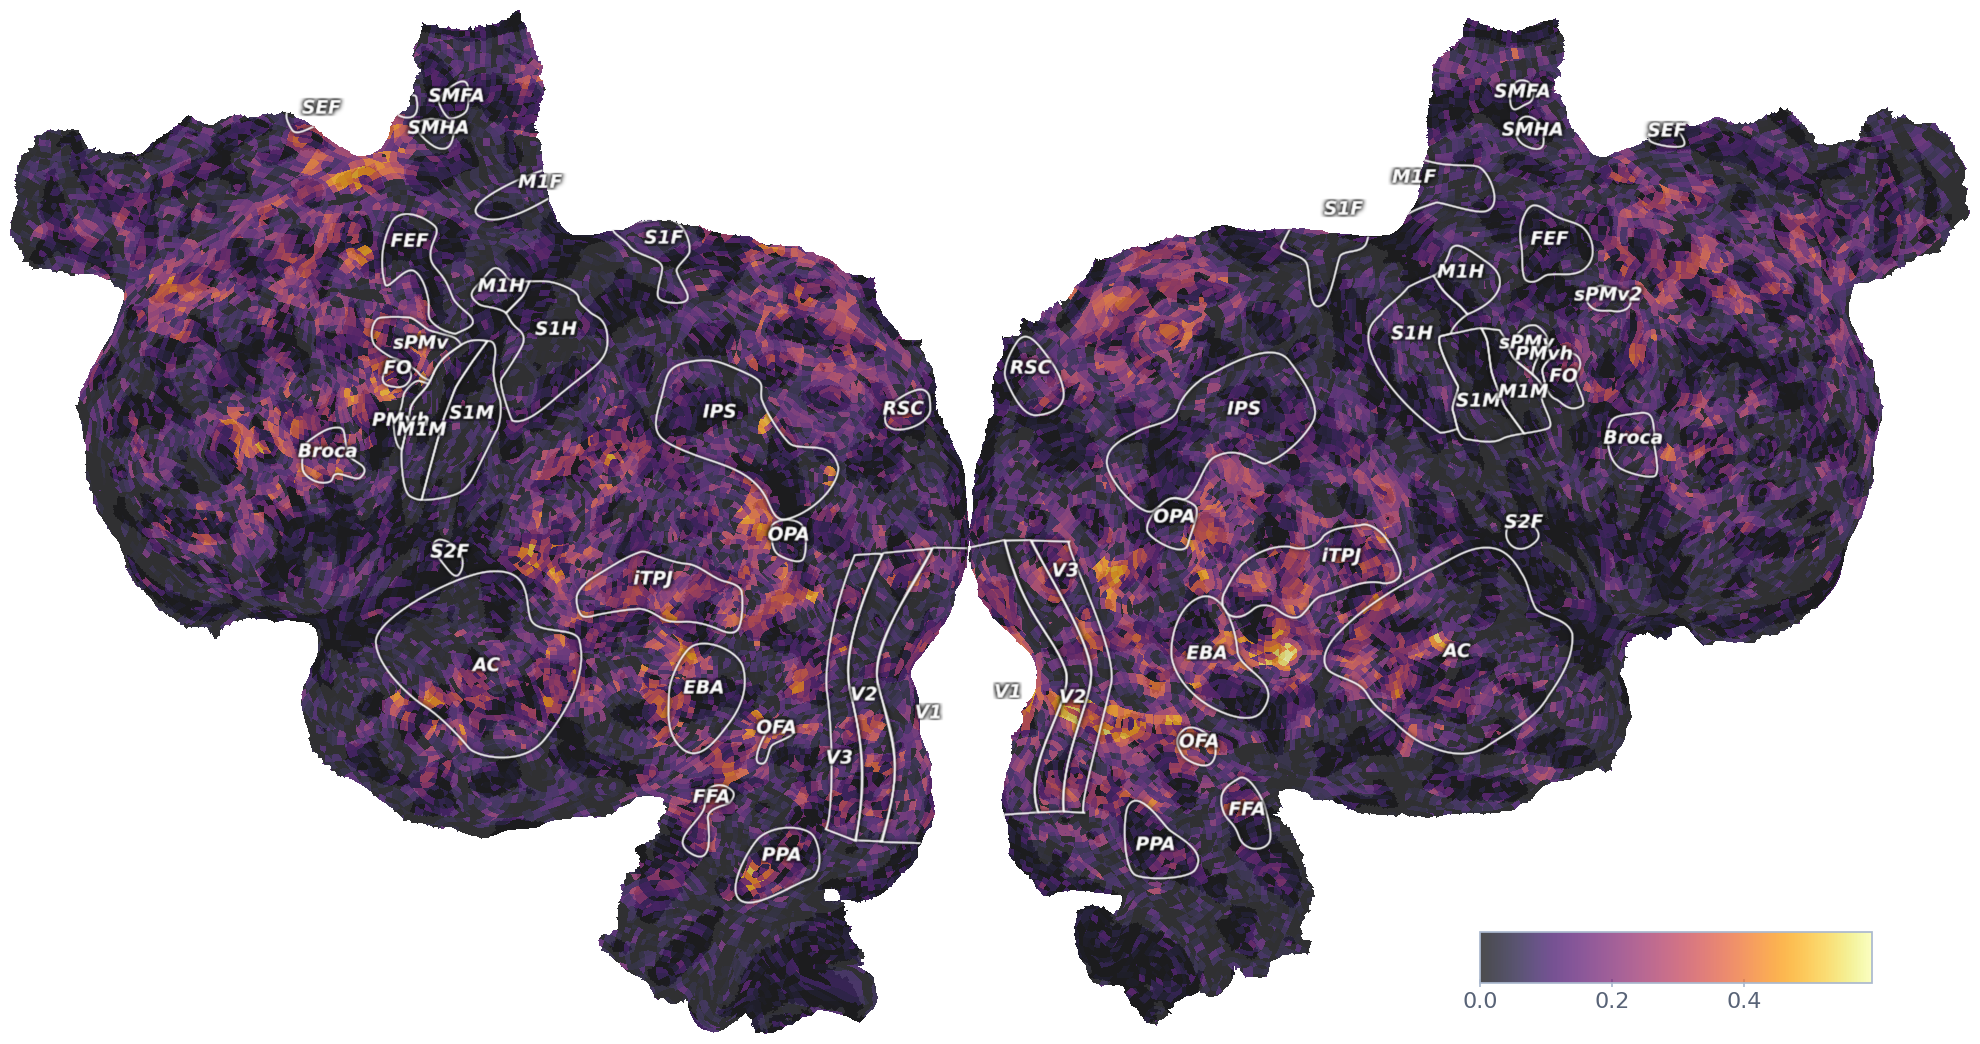

In [53]:
plot_flatmap_from_mapper(semantic_correlation, mapper_path, with_curvature=True, vmin=0,
                         vmax=vmax, colorbar_location=[0.75, 0.05, 0.2, 0.05])


## Joint Prediction

In [54]:
joint_file = os.path.join(get_result_path(modality, subject), f"joint_english1000_{low_level_feature}_scores.csv")

In [55]:
joint_scores = pd.read_csv(joint_file)
joint_scores.describe()

correlation_score      r2_score       p_value
count       80249.000000  80615.000000  8.024900e+04
mean            0.052588      0.006415  3.810364e-01
std             0.096072      0.025367  3.154357e-01
min            -0.237531     -0.111616  1.522456e-39
25%            -0.010252     -0.001113  7.581168e-02
50%             0.039656      0.000101  3.299389e-01
75%             0.097458      0.004712  6.498567e-01
max             0.671746      0.443000  9.999585e-01

In [56]:
joint_correlation = joint_scores['correlation_score']
joint_correlation = joint_correlation.to_numpy()
joint_correlation = np.nan_to_num(joint_correlation)

significant_voxels = [True if p_value < 0.05 else False for p_value in joint_scores['p_value']]
masked_correlation = np.full(joint_correlation.shape, np.nan)
# set values to nan, if not significant
masked_correlation[significant_voxels] = joint_correlation[significant_voxels]

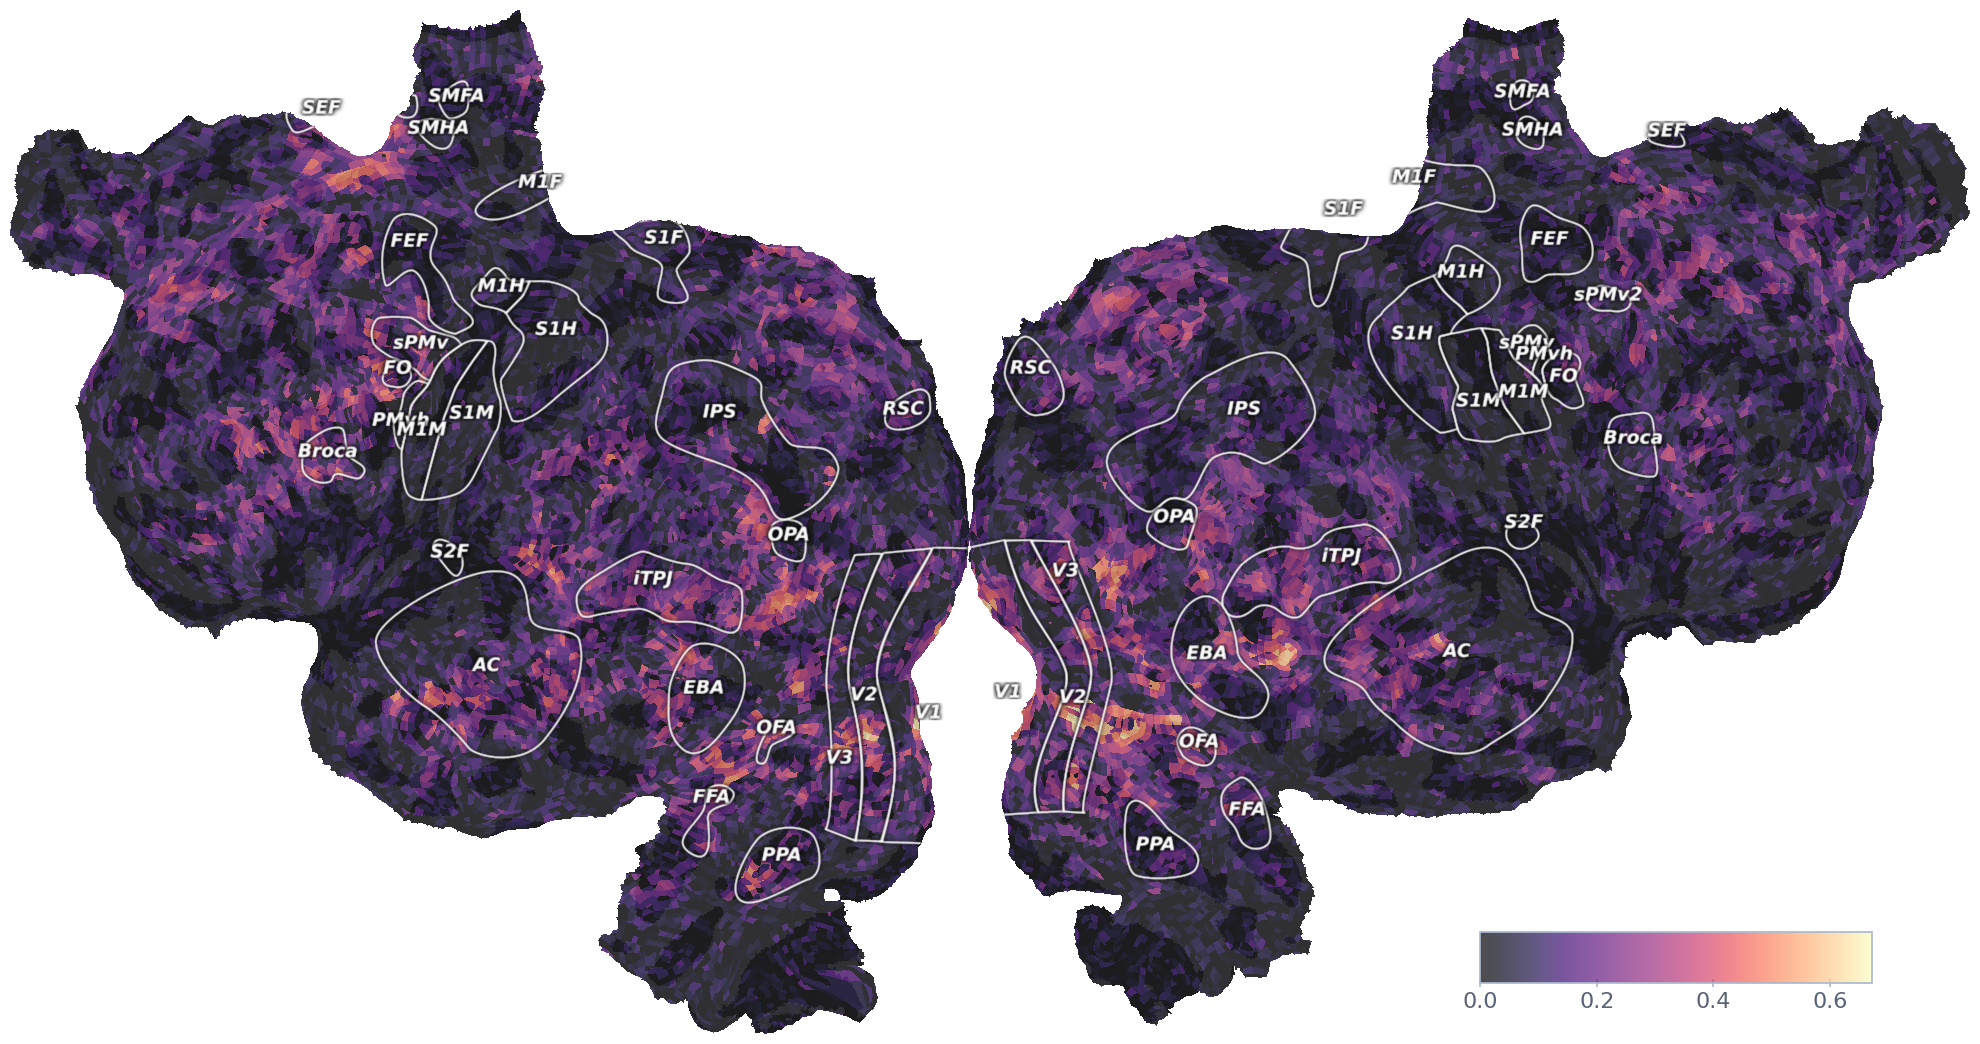

In [57]:
plot_flatmap_from_mapper(joint_correlation, mapper_path, vmin=0,
                         vmax=np.max(joint_correlation), colorbar_location=[0.75, 0.05, 0.2, 0.05], cmap='magma')

plt.show()

In [58]:
vp_path = os.path.join(get_result_path(modality, subject), f"vp_english1000_{low_level_feature}_scores.csv")

In [59]:
vp_scores = pd.read_csv(vp_path)
vp_scores.describe()

semantic\moten   joint\moten  semantic\moten_r2  joint\moten_r2
count    80249.000000  80249.000000       80615.000000    80615.000000
mean         0.033650      0.033650           0.001171        0.004759
std          0.087200      0.087200           0.007931        0.018632
min         -0.291297     -0.291297          -0.065637       -0.111616
25%         -0.019337     -0.019337          -0.000050       -0.000324
50%          0.019849      0.019849           0.000000        0.000040
75%          0.075847      0.075847           0.000387        0.003551
max          0.527533      0.527533           0.260465        0.222011

In [60]:
vp_correlation = vp_scores[f'semantic\\{low_level_feature}']
vp_correlation = np.array(vp_correlation)
# vp_correlation = semantic_minus_low_level

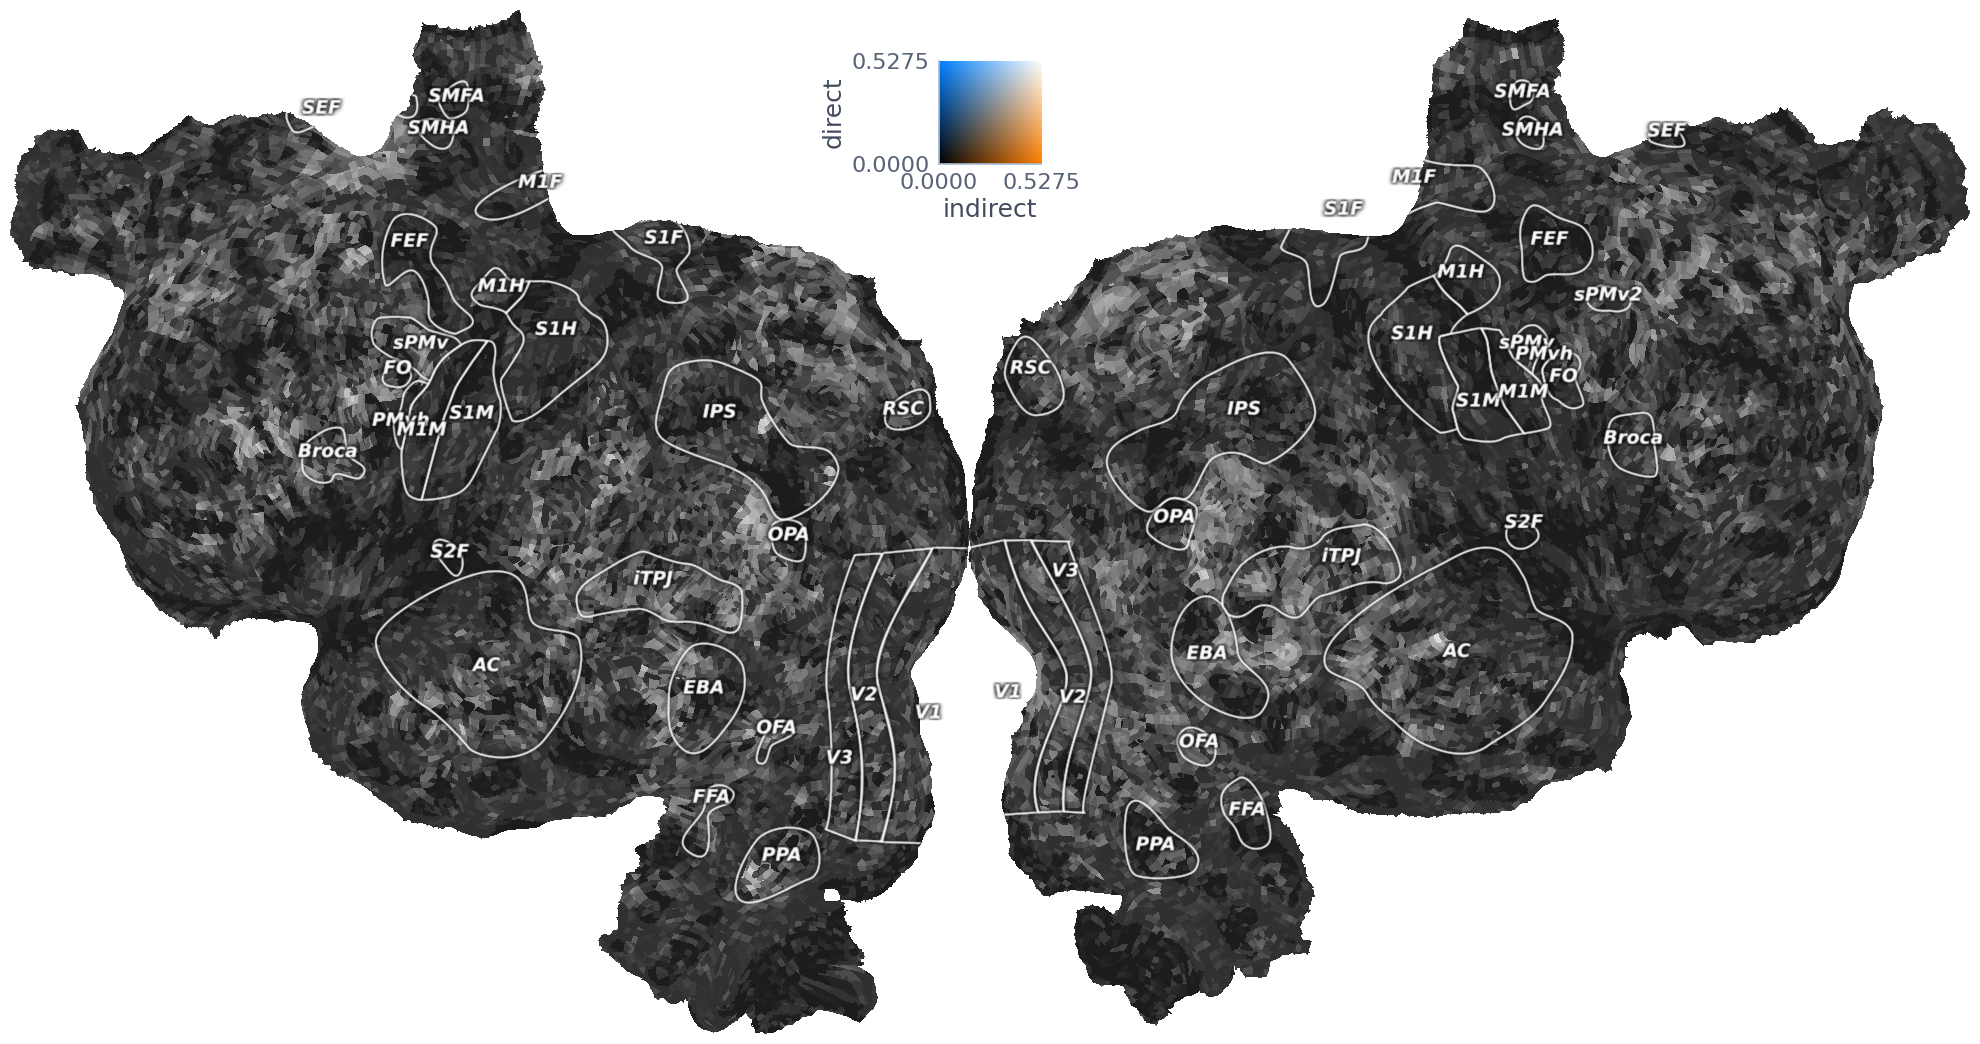

In [61]:
indirect = vp_scores[f'semantic\\{low_level_feature}']
direct = vp_scores[f'joint\\{low_level_feature}']
vmax = max(indirect.max(), direct.max())

plot_2d_flatmap_from_mapper(indirect, direct, mapper_path, vmin=0, vmin2=0, vmax=vmax, vmax2=vmax, label_1="indirect",
                            label_2='direct')
plt.show()

# Residual Method

In [62]:
cross_path = os.path.join(get_result_path(modality, subject), f"cross_{low_level_feature}_english1000_scores.csv")
cross_ridge_path = os.path.join(get_result_path(modality, subject),
                                f"cross_ridge_{low_level_feature}_english1000_scores.csv")

In [63]:
r2_scores = np.array(pd.read_csv(cross_path))
r2_scores_ridge = np.array(pd.read_csv(cross_ridge_path))

<Axes: ylabel='Count'>

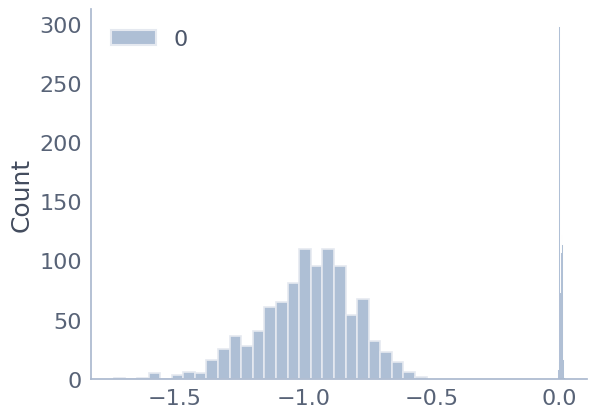

In [64]:
sns.histplot(r2_scores, label="OLS")
sns.histplot(r2_scores_ridge, label="Ridge")

In [65]:
means = [r2_scores.mean(), r2_scores_ridge.mean()]

Text(0.0, 1.0, 'Motion Energy')

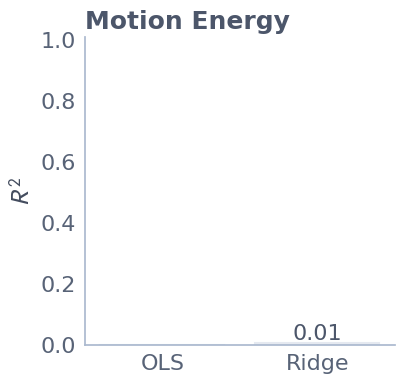

In [66]:
plt.subplots(figsize=(4, 4))
ax = sns.barplot(x=["OLS", "Ridge"], y=means)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.ylim([0, 1.01])

plt.ylabel(r"$R^2$")
plt.title(get_pretty_feature_name(low_level_feature))

## Residuals

### OLS

In [67]:
residual_file = os.path.join(get_result_path(modality, subject), f"residual_{low_level_feature}_english1000_scores.csv")

In [68]:
residual_scores = pd.read_csv(residual_file)
residual_scores.describe()

Unnamed: 0  correlation_score      r2_score       p_value
count  80615.000000       80249.000000  80615.000000  8.024900e+04
mean   40307.000000           0.031654     -0.005655  4.293387e-01
std    23271.690312           0.073387      0.023977  3.080017e-01
min        0.000000          -0.236717     -0.301221  1.584422e-14
25%    20153.500000          -0.018087     -0.003500  1.424375e-01
50%    40307.000000           0.027058      0.000000  4.051199e-01
75%    60460.500000           0.075538      0.000241  6.960273e-01
max    80614.000000           0.430021      0.133683  9.999959e-01

In [69]:
residual_correlation = residual_scores['correlation_score']
residual_correlation = residual_correlation.to_numpy()
residual_correlation = np.nan_to_num(residual_correlation)

In [ ]:
plot_flatmap_from_mapper(residual_correlation, mapper_path, vmin=0,
                         vmax=np.max(residual_correlation),
                         colorbar_location=[0.75, 0.05, 0.2, 0.05])

plt.show()

### Ridge

In [ ]:
residual_ridge_file = os.path.join(get_result_path(modality, subject),
                                   f"residual_ridge_{low_level_feature}_english1000_scores.csv")

In [ ]:
residual_ridge_scores = pd.read_csv(residual_ridge_file)
residual_ridge_scores.describe()

In [ ]:
residual_ridge_correlation = residual_ridge_scores['correlation_score']
residual_ridge_correlation = residual_ridge_correlation.to_numpy()
residual_ridge_correlation = np.nan_to_num(residual_ridge_correlation)

In [ ]:
plot_flatmap_from_mapper(residual_correlation, mapper_path, vmin=0,
                         vmax=np.max(residual_correlation),
                         colorbar_location=[0.75, 0.05, 0.2, 0.05])

plt.show()

In [ ]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.axis('off')

vmin = 0
vmax = max(residual_ridge_correlation.max(), residual_correlation.max())
plot_2d_flatmap_from_mapper(residual_ridge_correlation, residual_correlation, mapper_path, vmin=vmin, vmax=vmax,
                            vmin2=vmin,
                            vmax2=vmax, alpha=1, label_1='RM (R)', label_2="RM (OLS)", ax=ax, with_rois=False,
                            colorbar_location=[0.86, 0.09, 0.2, 0.2])
# get child axis
children = ax.get_children()
print(len(children))
cbar = children[11]
# set formatter
cbar.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cbar.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [ ]:
from matplotlib.ticker import FormatStrFormatter

figsize = np.array(flatmap_mask.shape) / 100.
fig, axs = plt.subplots(1, 3, figsize=figsize)

vmin = 0
vmax = max(np.nan_to_num(vp_correlation).max(), residual_correlation.max())
for i, (ax, corr, name) in enumerate(
        zip(axs, [residual_ridge_correlation, residual_correlation, vp_correlation],
            ["Residual Method (Ridge)", "Residual Method (OLS)", "Variance Partitioning"])):
    plot_2d_flatmap_from_mapper(corr, semantic_correlation, mapper_path, vmin=vmin, vmax=vmax, vmin2=vmin,
                                vmax2=vmax, alpha=1, label_1="", label_2="", ax=ax, with_rois=False,
                                colorbar_location=[0.38, 0.9, 0.2, 0.2])

    ax.axis('off')
    ax.set_xlabel(name)

    # get child axis
    children = ax.get_children()
    print(len(children))
    cbar = children[11]
    # set formatter
    cbar.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    cbar.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
fig.supylabel("Semantic")
plt.tight_layout()

# Plot visual cortex side by side

In [ ]:
viewport_size = 400
fig, axs = plt.subplots(1, 4, figsize=(viewport_size / 100 * 4, viewport_size / 100))

vmax = max(semantic_correlation.max(), residual_correlation.max(), vp_correlation.max(),
           residual_ridge_correlation.max())

cmap = 'magma'
alpha = 1
width = flatmap_mask.shape[0]
height = flatmap_mask.shape[1]
vcenter = 2 * height / 3
hcenter = width / 2 - 25

for i, (corr, name) in enumerate(
        zip([semantic_correlation, residual_ridge_correlation, residual_correlation, vp_correlation],
            ["Semantic Feature", "Residual Method (Ridge)", "Residual Method (OLS)", "Variance Partitioning"])):
    ax = axs[i]

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_xlim([hcenter - viewport_size / 2, hcenter + viewport_size / 2])
    ax.set_ylim([vcenter + viewport_size / 2, vcenter - viewport_size / 2])
    ax.set_title(name)
    plot_flatmap_from_mapper(corr, mapper_path, ax=ax, vmin=0, vmax=vmax, with_colorbar=False, cmap=cmap, alpha=alpha)

cbar_ax = fig.add_axes((1, 0.05, .03, 0.89))
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='magma'), cax=cbar_ax, orientation='vertical')
# cbar.ax.set_title(r"$\rho$", fontsize=26)
cbar.set_label(r"$\rho$", fontsize=26,
               rotation='horizontal')

axs[1].set_ylabel(get_pretty_feature_name(low_level_feature), weight='bold', fontsize=24)
plt.tight_layout()
plt.show()

# Plot auditory cortex side-by-side

In [ ]:
viewport_size = 450
fig, axs = plt.subplots(2, 4, figsize=(viewport_size / 100 * 4, viewport_size / 100))

vmax = max(semantic_correlation.max(), residual_correlation.max(), vp_correlation.max(),
           residual_ridge_correlation.max())

cmap = 'magma'
alpha = 1

width = flatmap_mask.shape[0]
height = flatmap_mask.shape[1]
vcenter = 2 * height / 3
hcenter = width / 2

left_ac = hcenter - 500
right_ac = hcenter + 450
vac = 650

for row, ac in enumerate([left_ac, right_ac]):
    for col, (corr, name) in enumerate(
            zip([semantic_correlation, residual_ridge_correlation, residual_correlation, vp_correlation],
                ["Semantic Feature", "Residual Method (Ridge)", "Residual Method (OLS)", "Variance Partitioning"])):
        ax = axs[row, col]

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])  # Remove x ticks
        ax.set_yticks([])  # Remove y ticks

        ax.set_xlim([ac - viewport_size / 2, ac + viewport_size / 2])
        ax.set_ylim([vac + viewport_size / 4, vac - viewport_size / 4])

        if row == 0:
            ax.set_title(name)

        plot_flatmap_from_mapper(corr, mapper_path, ax=ax, vmin=0, vmax=vmax, with_colorbar=False, cmap=cmap,
                                 alpha=alpha)

fig.text(0, .65, "LH", rotation=90, horizontalalignment='left', weight='bold')
fig.text(0, .25, "RH", rotation=90, horizontalalignment='left', weight='bold')

cbar_ax = fig.add_axes((1, 0.05, .03, 0.89))
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='magma'), cax=cbar_ax, orientation='vertical')
cbar.set_label(r"$\rho$", fontsize=26, rotation='horizontal', loc='center')

axs[0, 1].set_ylabel(get_pretty_feature_name(low_level_feature), weight='bold', fontsize=24, ha="right")
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()